# Visualizations

This jupyter notebook will contain all the visualizations needed for Phase 2

## Importing necessary libraries

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math

## Reading data

In [6]:
df = pd.read_csv('../Phase_1/train.csv')
df.head()

,flight_number,airline_name,code_shared_flag,type,status,departure_iata_code,departure_icao_code,departure_scheduled_time,departure_actual_time,arrival_iata_code,...,Humidity (%)_min,Wind Speed (mph)_max,Wind Speed (mph)_avg,Wind Speed (mph)_min,Pressure (in)_max,Pressure (in)_avg,Pressure (in)_min,delay_time,day_of_week,hour_of_day
0,410,airblue,0,departure,active,lhe,opla,2024-01-31 13:00:00,2024-01-31 13:16:00,dxb,...,77,12,5.8,0,29.3,29.2,29.2,16.0,Wednesday,13
1,843,flyjinnah,0,departure,active,lhe,opla,2024-01-25 15:05:00,NaN,khi,...,67,3,0.1,0,29.4,29.4,29.4,NaN,Thursday,15
2,318,flynas,0,departure,active,lhe,opla,2024-01-27 15:40:00,2024-01-27 15:41:00,ruh,...,40,12,3.9,0,29.4,29.3,29.3,1.0,Saturday,15
3,843,flyjinnah,0,departure,active,lhe,opla,2024-01-19 15:05:00,NaN,khi,...,63,6,1.7,0,29.4,29.3,29.3,NaN,Friday,15
4,8284,american airlines,1,departure,active,lhe,opla,2024-01-25 02:55:00,2024-01-25 03:06:00,doh,...,67,3,0.1,0,29.4,29.4,29.4,11.0,Thursday,2


In [7]:
df[['status','departure_actual_time','departure_scheduled_time','delay_time']]

,status,departure_actual_time,departure_scheduled_time,delay_time
0,active,2024-01-31 13:16:00,2024-01-31 13:00:00,16.0
1,active,NaN,2024-01-25 15:05:00,NaN
2,active,2024-01-27 15:41:00,2024-01-27 15:40:00,1.0
3,active,NaN,2024-01-19 15:05:00,NaN
4,active,2024-01-25 03:06:00,2024-01-25 02:55:00,11.0
...,...,...,...,...
51567,active,NaN,2024-01-25 03:10:00,NaN
51568,active,NaN,2024-01-16 13:40:00,NaN
51569,active,2024-01-18 22:30:00,2024-01-18 22:15:00,15.0
51570,active,NaN,2024-01-22 13:00:00,NaN


## Replace the negative delay times with zero

In [8]:
df['delay_time'].mean()

np.float64(10.905195224265892)

In [9]:
df['delay_time'] = df['delay_time'].clip(lower=0)

## Now fill nan values of active flight with mean

In [10]:
df.loc[df['status'] == 'active', 'delay_time'] = df.loc[df['status'] == 'active', 'delay_time'].fillna(
    df.loc[df['status'] == 'active', 'delay_time'].mean()
)

## Visualizations

In [11]:
df['day_of_week'].unique()

array(['Wednesday', 'Thursday', 'Saturday', 'Friday', 'Tuesday', 'Monday',
       'Sunday'], dtype=object)

In [12]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

## Histogram of delay time

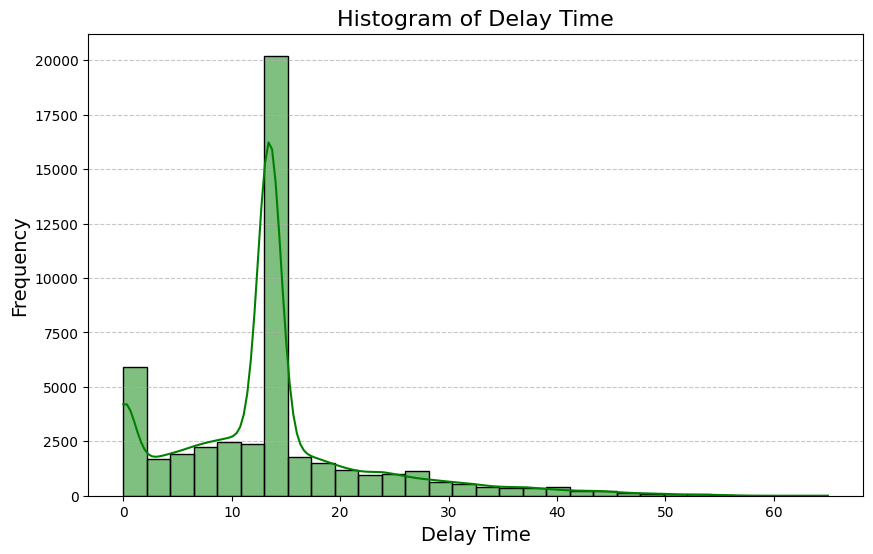

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['delay_time'], bins=30, kde=True, color='green')
# plt.axvline(x=0, color='red', linestyle='--', label='On-Time Departure')
plt.title('Histogram of Delay Time', fontsize=16)
plt.xlabel('Delay Time', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('plots/histogram_of_delay_time',dpi=300, bbox_inches='tight')
plt.show()

## Delay Time vs Month

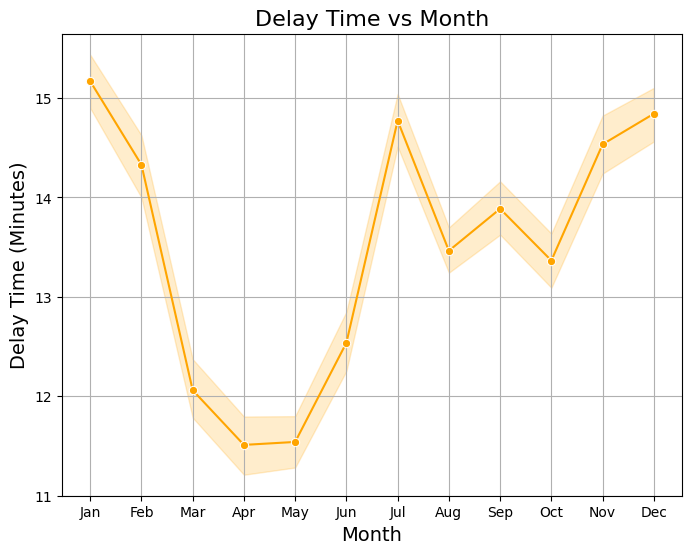

In [42]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df['Month'], y=df['delay_time'], color='orange', marker='o')
plt.title('Delay Time vs Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Delay Time (Minutes)', fontsize=14)
plt.savefig('plots/delay_time_vs_month',dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

## Delay Time vs Day of the week

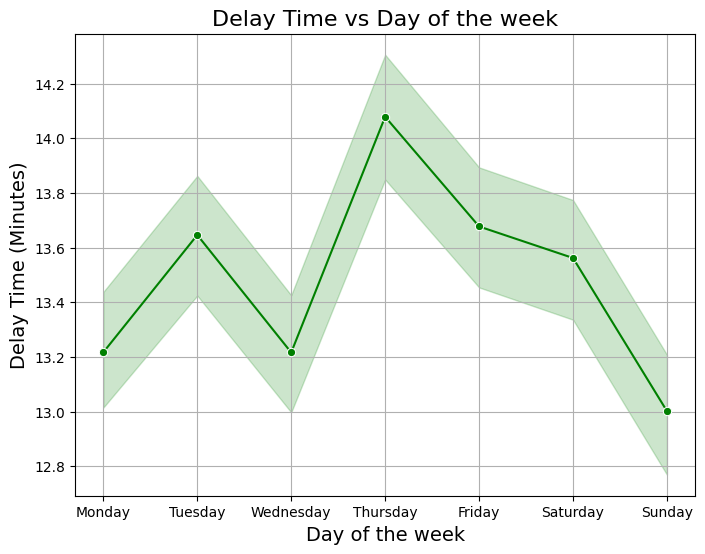

In [43]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df['day_of_week'], y=df['delay_time'], color='green', marker='o')
plt.title('Delay Time vs Day of the week', fontsize=16)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Delay Time (Minutes)', fontsize=14)
plt.grid()
plt.savefig('plots/delay_time_vs_week',dpi=300, bbox_inches='tight')
plt.show()

## Delay Time vs Hours of the Day

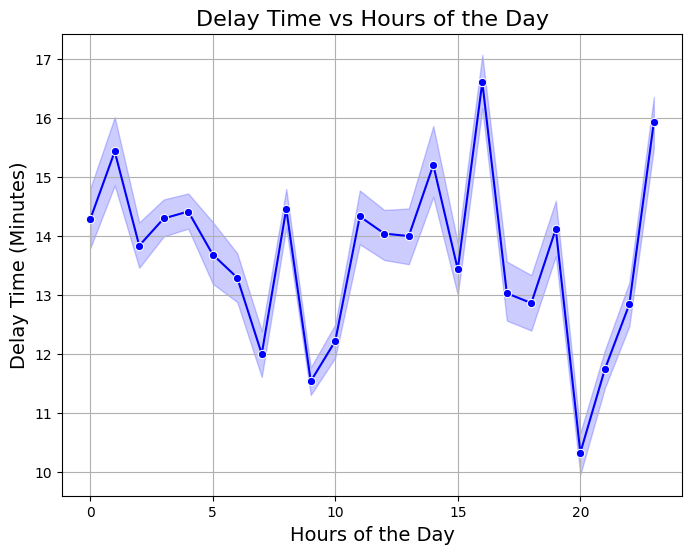

In [46]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df['hour_of_day'], y=df['delay_time'], color='blue', marker='o')
plt.title('Delay Time vs Hours of the Day', fontsize=16)
plt.xlabel('Hours of the Day', fontsize=14)
plt.ylabel('Delay Time (Minutes)', fontsize=14)
plt.grid()
plt.savefig('plots/delay_time_vs_hours_of_day',dpi=300, bbox_inches='tight')
plt.show()

## Delay time vs Flight status

In [18]:
df[df['status']=='cancelled']['delay_time'].isnull()

34       True
49       True
105      True
109      True
144      True
         ... 
51467    True
51476    True
51515    True
51561    True
51571    True
Name: delay_time, Length: 1772, dtype: bool

In [14]:
len(df[df['status']=='unknown']),len(df[df['status']=='cancelled']),len(df[df['status']=='active'])

(1892, 1772, 47908)

In [21]:
temp_df = df.copy()
temp_df['delay_time'].fillna(temp_df['delay_time'].mean(),inplace=True)

/tmp/ipykernel_8483/2537378588.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df['delay_time'].fillna(temp_df['delay_time'].mean(),inplace=True)


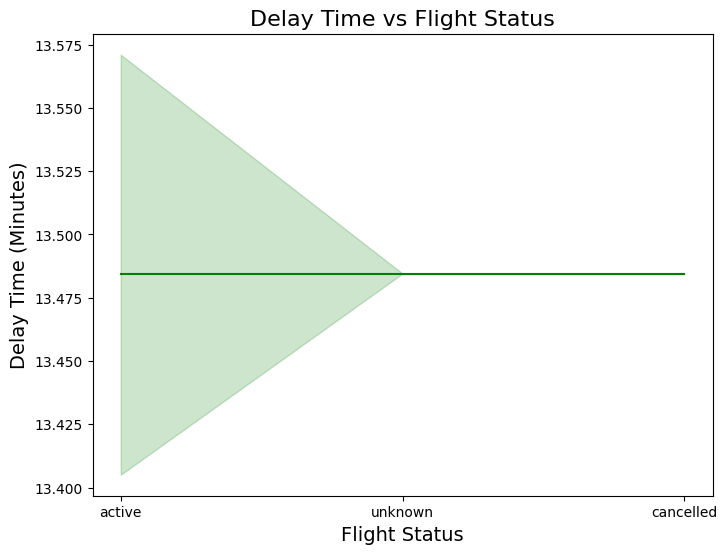

In [40]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=temp_df['status'], y=temp_df['delay_time'], color='green')
plt.title('Delay Time vs Flight Status', fontsize=16)
plt.xlabel('Flight Status', fontsize=14)
plt.ylabel('Delay Time (Minutes)', fontsize=14)
plt.savefig('plots/delay_time_vs_flight_status',dpi=300, bbox_inches='tight')
plt.show()

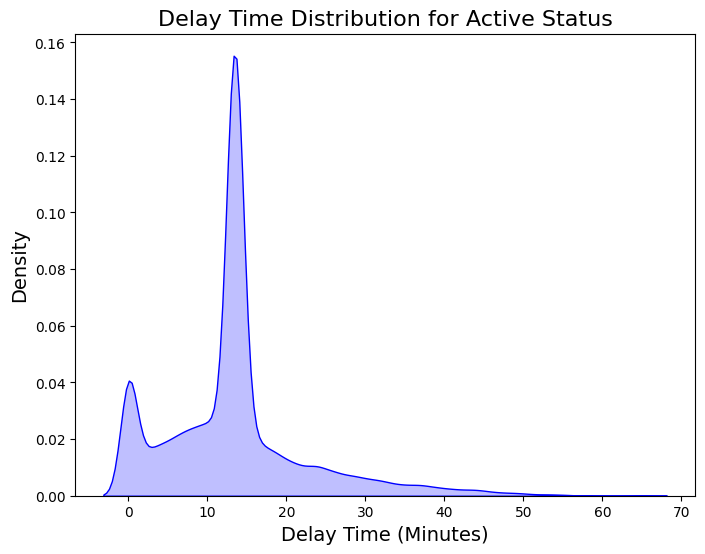

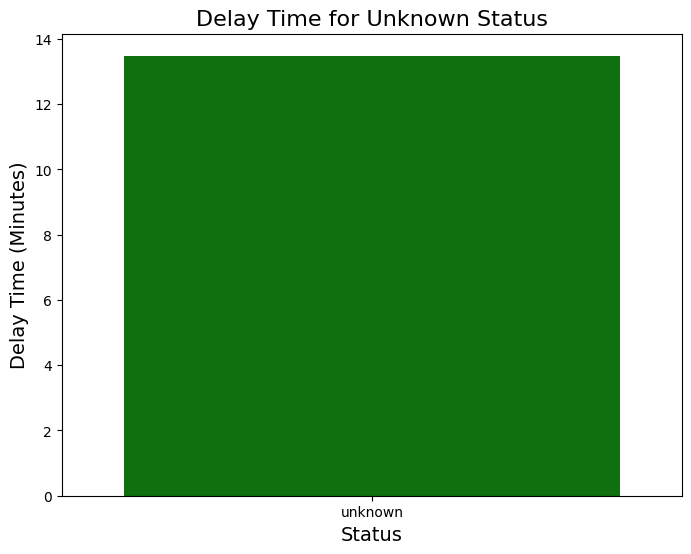

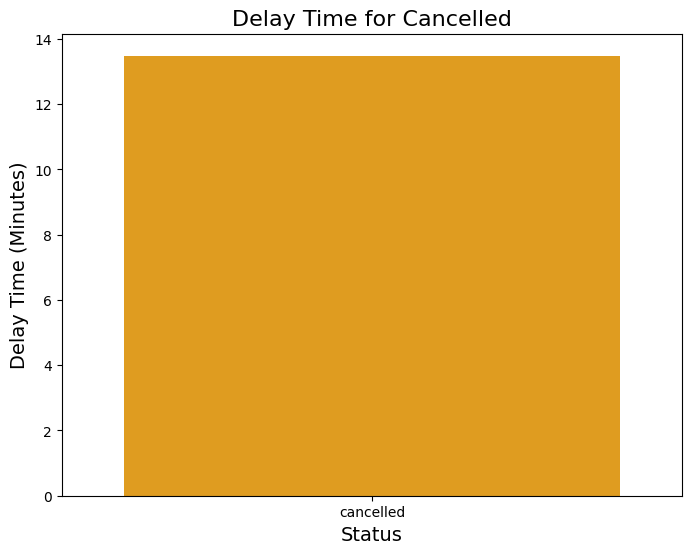

In [39]:

active_status = temp_df[temp_df['status'] == 'active']
status_1 = temp_df[temp_df['status'] == 'unknown']
status_2 = temp_df[temp_df['status'] == 'cancelled']

plt.figure(figsize=(8, 6))
sns.kdeplot(data=active_status, x='delay_time', color='blue', fill=True)
plt.title('Delay Time Distribution for Active Status', fontsize=16)
plt.xlabel('Delay Time (Minutes)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.savefig('plots/delay_time_vs_active_status',dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=status_1, x='status', y='delay_time', color='green')
plt.title('Delay Time for Unknown Status', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Delay Time (Minutes)', fontsize=14)
plt.savefig('plots/delay_time_vs_unknown_status',dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=status_2, x='status', y='delay_time', color='orange')
plt.title('Delay Time for Cancelled', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Delay Time (Minutes)', fontsize=14)
plt.savefig('plots/delay_time_vs_cancelled_status',dpi=300, bbox_inches='tight')
plt.show()

## Delay time vs airline

In [133]:
df['airline_name'].value_counts()['air arabia']

np.int64(684)

In [134]:
airline_stats = df.groupby('airline_name').agg(
    flight_count=('airline_name', 'size'),
    avg_delay_time=('delay_time', 'mean')
).reset_index().sort_values('flight_count', ascending=False)

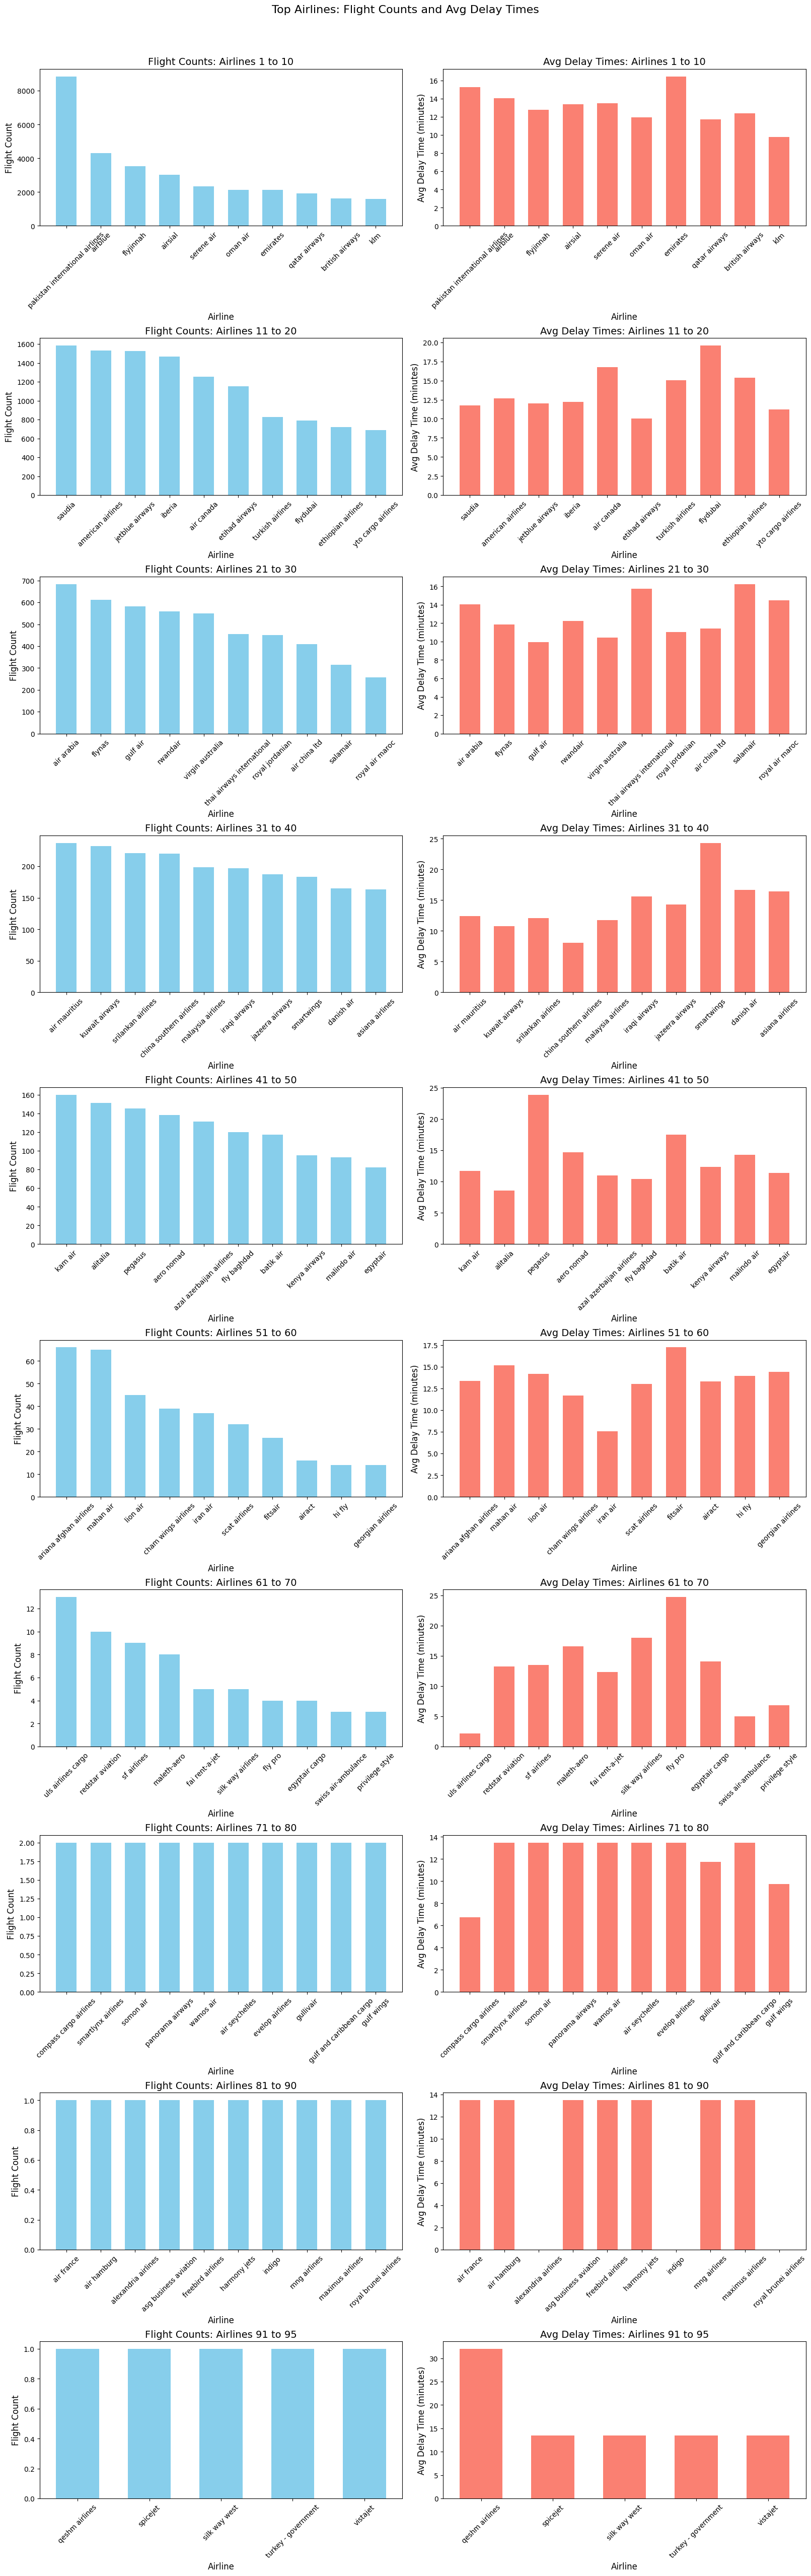

In [ ]:
k = 10
total_airlines = len(airline_stats)
num_rows = math.ceil(total_airlines / k)
fig, axes = plt.subplots(num_rows, 2, figsize=(16, 5 * num_rows), constrained_layout=True)
if num_rows == 1:
    axes = [axes]
for i in range(num_rows):
    start_idx = i * k
    end_idx = min(start_idx + k, total_airlines)
    subset = airline_stats.iloc[start_idx:end_idx]
    ax_left = axes[i][0]
    ax_left.bar(subset['airline_name'], subset['flight_count'], color='skyblue', width=0.6)
    ax_left.set_title(f'Flight Counts: Airlines {start_idx + 1} to {end_idx}', fontsize=14)
    ax_left.set_xlabel('Airline', fontsize=12)
    ax_left.set_ylabel('Flight Count', fontsize=12)
    ax_left.tick_params(axis='x', rotation=45)
    ax_right = axes[i][1]
    ax_right.bar(subset['airline_name'], subset['avg_delay_time'], color='salmon', width=0.6)
    ax_right.set_title(f'Avg Delay Times: Airlines {start_idx + 1} to {end_idx}', fontsize=14)
    ax_right.set_xlabel('Airline', fontsize=12)
    ax_right.set_ylabel('Avg Delay Time (minutes)', fontsize=12)
    ax_right.tick_params(axis='x', rotation=45)
plt.suptitle('Top Airlines: Flight Counts and Avg Delay Times', fontsize=16, y=1.02)
plt.savefig('plots/delay_time_vs_airline')
plt.show()

## Delay time vs departure airport

In [17]:
iata_stats = df.groupby('departure_iata_code').agg(
    mean_delay=('delay_time', 'mean'),
    flight_count=('delay_time', 'size')
).reset_index()

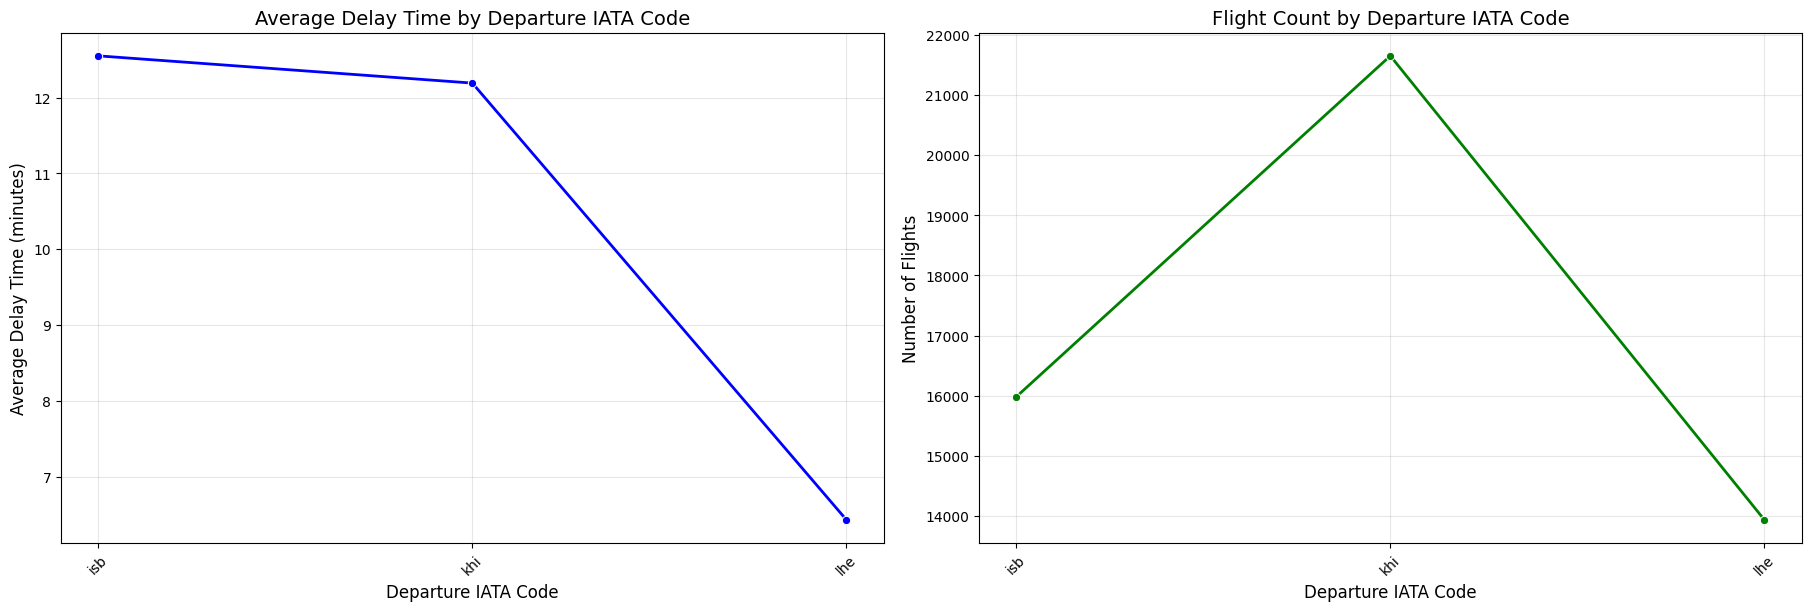

In [18]:
iata_stats = iata_stats.sort_values('mean_delay', ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=True)
sns.lineplot(
    ax=axes[0],
    x='departure_iata_code',
    y='mean_delay',
    data=iata_stats,
    marker='o',
    color='blue',
    linewidth=2
)
axes[0].set_xlabel('Departure IATA Code', fontsize=12)
axes[0].set_ylabel('Average Delay Time (minutes)', fontsize=12)
axes[0].set_title('Average Delay Time by Departure IATA Code', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(alpha=0.3)
sns.lineplot(
    ax=axes[1],
    x='departure_iata_code',
    y='flight_count',
    data=iata_stats,
    marker='o',
    color='green',
    linewidth=2
)
axes[1].set_xlabel('Departure IATA Code', fontsize=12)
axes[1].set_ylabel('Number of Flights', fontsize=12)
axes[1].set_title('Flight Count by Departure IATA Code', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(alpha=0.3)
plt.savefig('plots/delay_time_and_flight_count_vs_iata_code')
plt.show()

## Delay time vs ICAO code

In [12]:
icao_stats = df.groupby('departure_icao_code').agg(
    mean_delay=('delay_time', 'mean'),
    flight_count=('delay_time', 'size')
).reset_index()

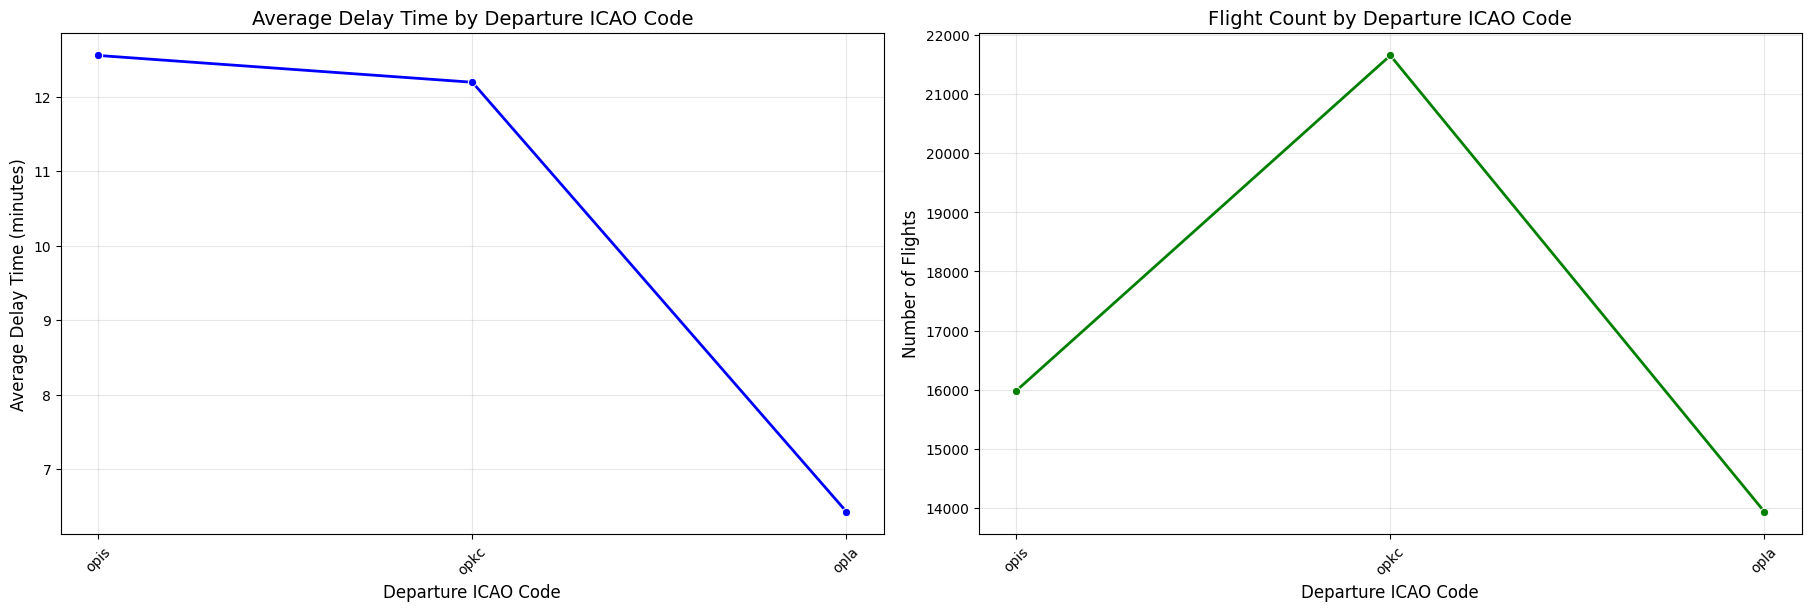

In [ ]:
icao_stats = icao_stats.sort_values('mean_delay', ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=True)
sns.lineplot(
    ax=axes[0],
    x='departure_icao_code',
    y='mean_delay',
    data=icao_stats,
    marker='o',
    color='blue',
    linewidth=2
)
axes[0].set_xlabel('Departure ICAO Code', fontsize=12)
axes[0].set_ylabel('Average Delay Time (minutes)', fontsize=12)
axes[0].set_title('Average Delay Time by Departure ICAO Code', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(alpha=0.3)
sns.lineplot(
    ax=axes[1],
    x='departure_icao_code',
    y='flight_count',
    data=icao_stats,
    marker='o',
    color='green',
    linewidth=2
)
axes[1].set_xlabel('Departure ICAO Code', fontsize=12)
axes[1].set_ylabel('Number of Flights', fontsize=12)
axes[1].set_title('Flight Count by Departure ICAO Code', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(alpha=0.3)
plt.savefig('plots/delay_time_and_flight_count_vs_icao_code')
plt.show()

## Correlation Analysis
Shows pairwise correlation between features as a grid with color intensity

In [30]:
selected_features = ['Temperature (°F)_max', 'Temperature (°F)_avg', 'Temperature (°F)_min', 
                     'Humidity (%)_max', 'Wind Speed (mph)_avg', 'Pressure (in)_avg']
correlation_matrix = temp_df[selected_features].corr()

### Visualization 1: Heatmap

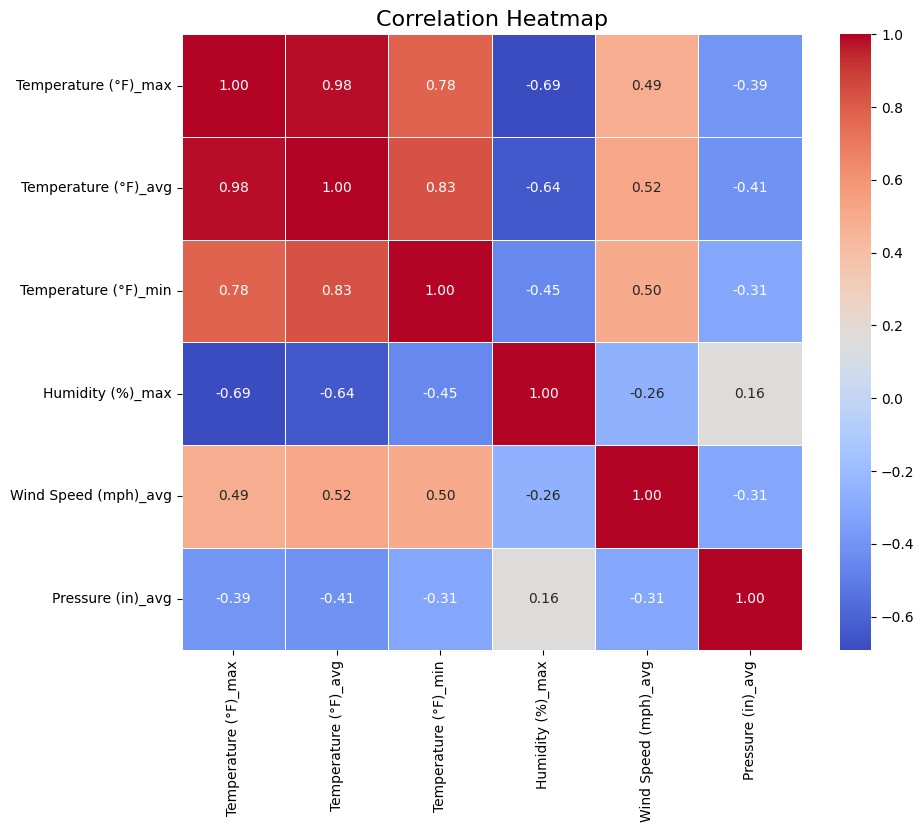

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.savefig('plots/correlation_pt1.png',dpi=300, bbox_inches='tight')
plt.show()

### Visualization 2: Pairplot
Displays scatter plots and histograms to visualize feature relationships.

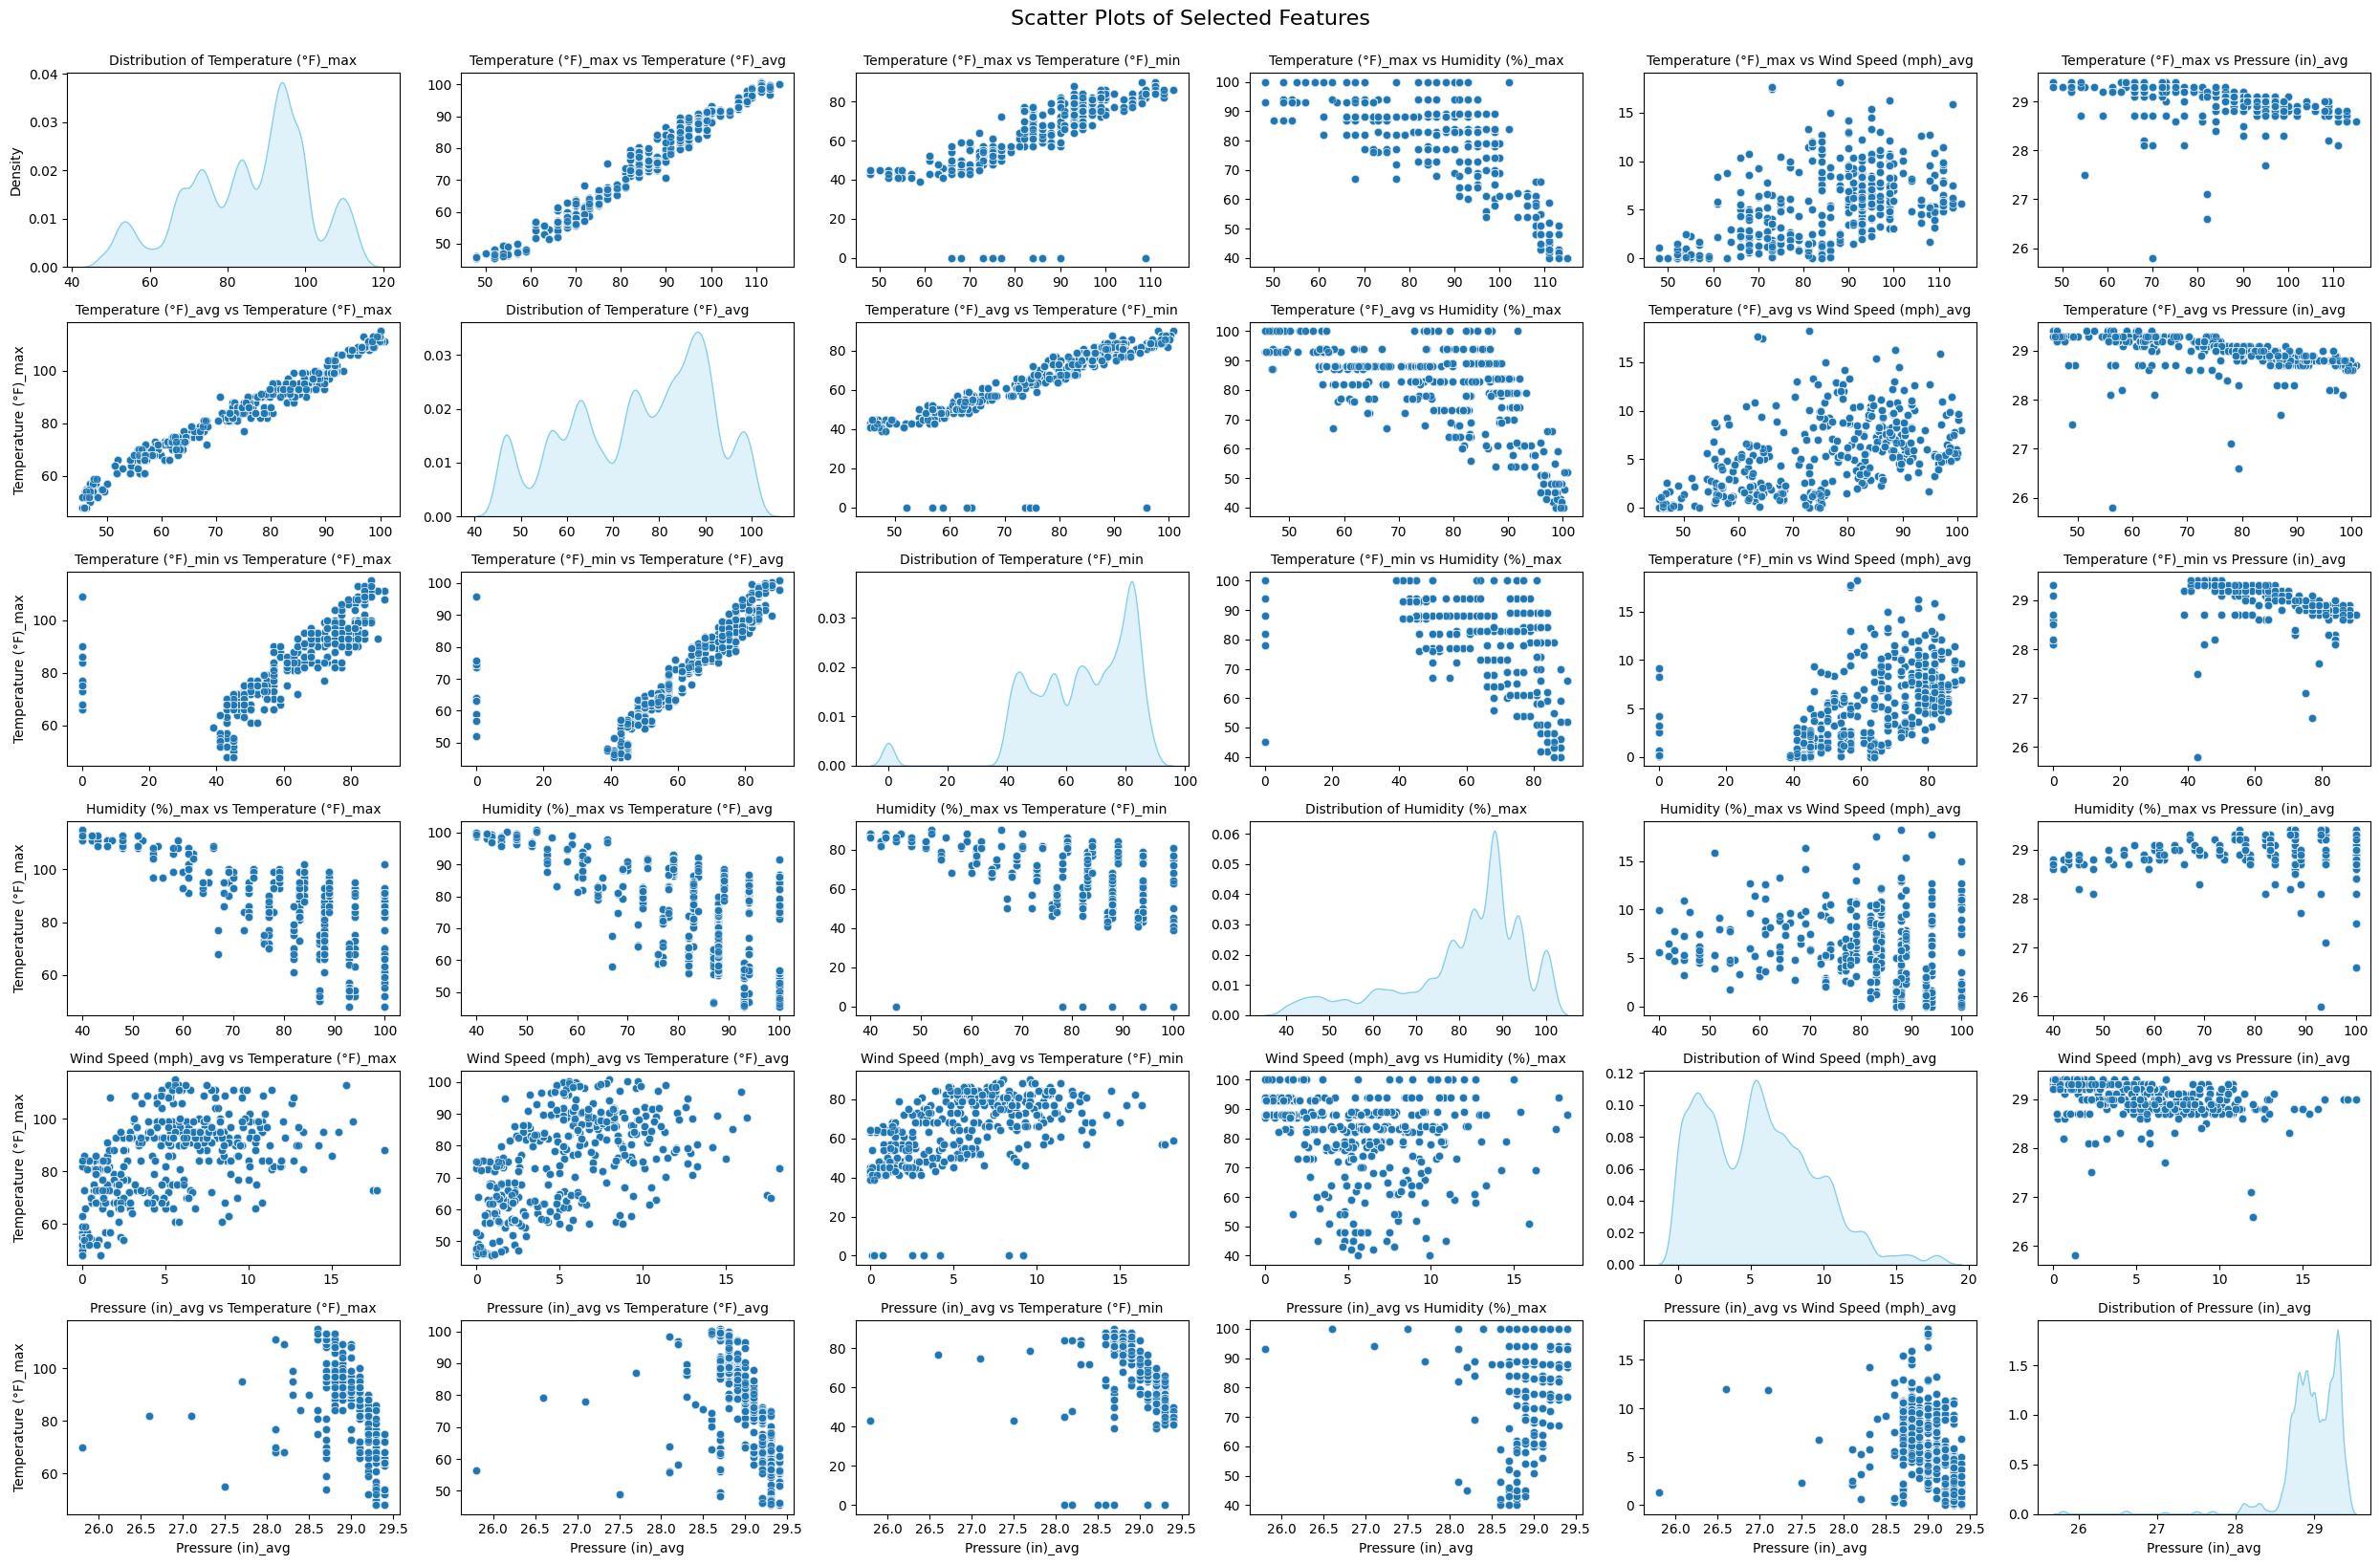

In [36]:
n_features = len(selected_features)
fig, axes = plt.subplots(n_features, n_features, figsize=(25, 16), sharex=False, sharey=False)

for i, feature_x in enumerate(selected_features):
    for j, feature_y in enumerate(selected_features):
        ax = axes[i, j]
        if i == j:
            sns.kdeplot(temp_df[feature_x], ax=ax, fill=True, color='skyblue')
            ax.set_title(f'Distribution of {feature_x}', fontsize=10)
        else:
            sns.scatterplot(x=temp_df[feature_x], y=temp_df[feature_y], alpha=0.6, ax=ax)
            ax.set_title(f'{feature_x} vs {feature_y}', fontsize=10)
        if j != 0:
            ax.set_ylabel('')
        if i != n_features - 1:
            ax.set_xlabel('')
plt.tight_layout()
plt.suptitle('Scatter Plots of Selected Features', y=1.02, fontsize=16)
plt.savefig('plots/correlation_analysis_pt2.png',dpi=300, bbox_inches='tight')
plt.show()

### Visualization 3: Clustered Heatmap
Groups features based on their correlation

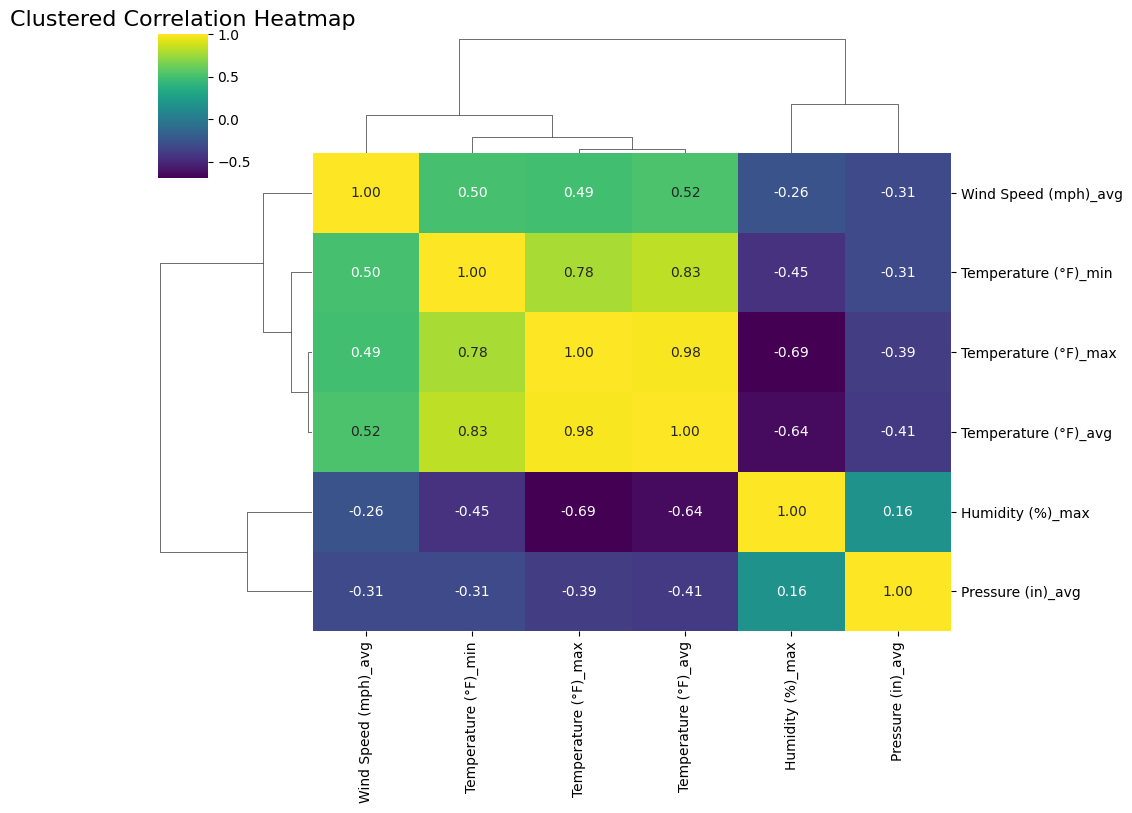

In [37]:
sns.clustermap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", figsize=(10, 8))
plt.title('Clustered Correlation Heatmap', fontsize=16)
plt.savefig('plots/correlation_pt3.png',dpi=300, bbox_inches='tight')
plt.show()